In [4]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
pca_data = pd.read_csv('pca_data.csv', index_col = 0)
pca_data.head()

,Principal Component 1,Principal Component 2,Principal Component 3
0,0.249932,-0.410282,-0.486739
1,0.267504,-0.406824,-0.489936
2,0.207328,-0.415174,-0.477567
3,0.322638,-0.405149,-0.503721
4,0.335696,-0.406574,-0.507715


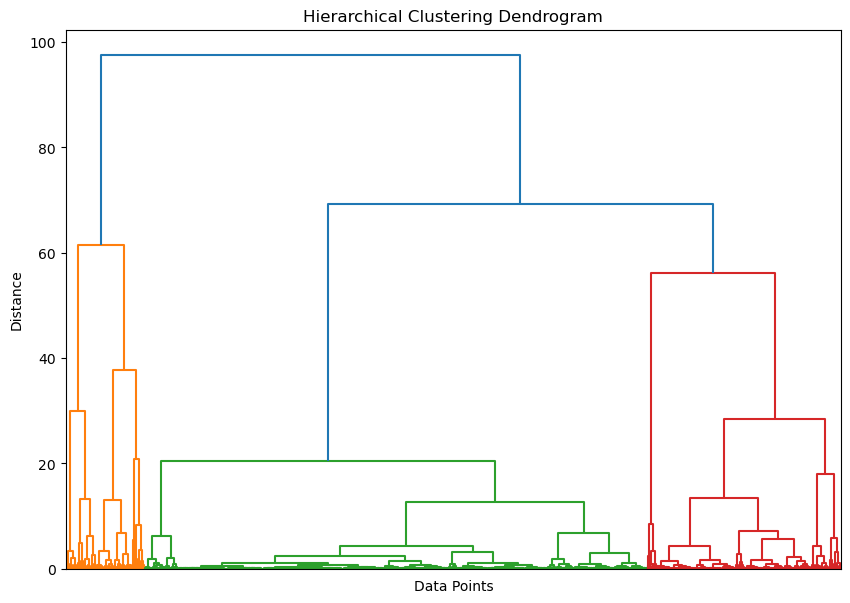

In [10]:
Z = linkage(pca_data, method='ward')  # 'ward' minimizes the variance within clusters

# Step 2: Plot the Dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Create the dendrogram
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., no_labels = True)

plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster_labels = agg_clustering.fit_predict(pca_data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


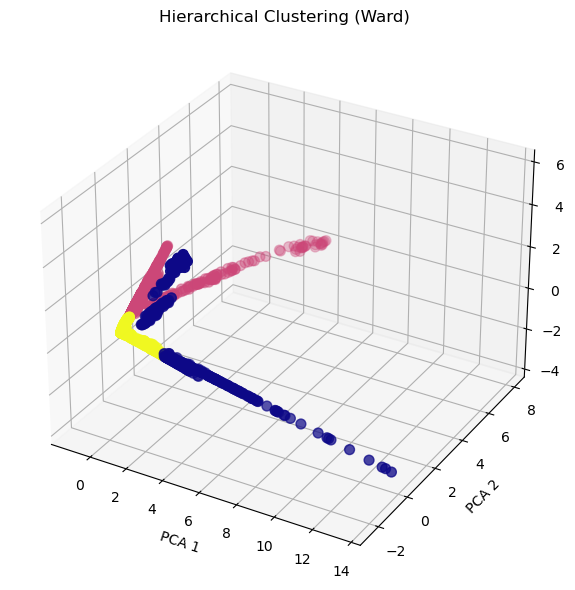

In [16]:
fig = plt.figure(figsize=(14, 6))

# 3D Plot for Hierarchical Clustering
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], pca_data.iloc[:, 2], c=agg_cluster_labels, cmap='plasma', s=50)
ax2.set_title('Hierarchical Clustering (Ward)')
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_zlabel('PCA 3')

plt.tight_layout()
plt.show()

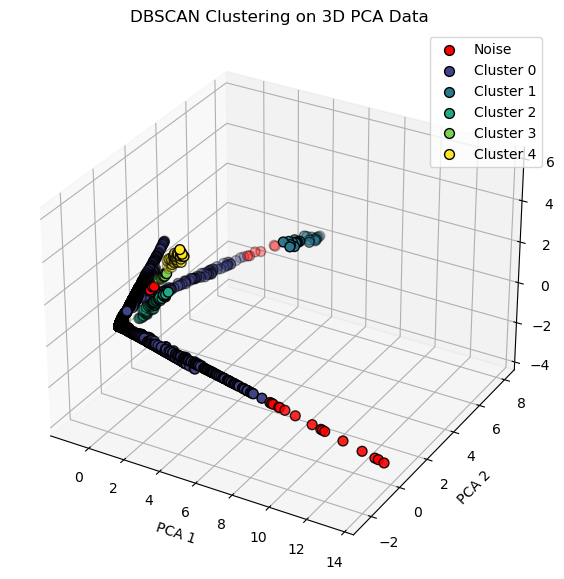

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(pca_data)

# Step 2: Visualize the DBSCAN Results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap to distinguish clusters, -1 corresponds to noise
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:  # Label -1 is for noise
        color = 'r'  # red color for noise
        label_name = 'Noise'
    else:
        label_name = f'Cluster {label}'

    # Select data points corresponding to the current cluster label
    cluster_points = pca_data[dbscan_labels == label]
    
    # Scatter plot for each cluster
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], 
               s=50, c=[color], label=label_name, edgecolors='k')

# Labels and title
ax.set_title('DBSCAN Clustering on 3D PCA Data')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Add legend to show clusters and noise
plt.legend()
plt.show()

In [24]:
pca_data2 = pd.read_csv('pca_data.csv', index_col = 0)
pca_data2 = pca_data2.drop(columns = ['Principal Component 3'])
pca_data2.head()

,Principal Component 1,Principal Component 2
0,0.249932,-0.410282
1,0.267504,-0.406824
2,0.207328,-0.415174
3,0.322638,-0.405149
4,0.335696,-0.406574


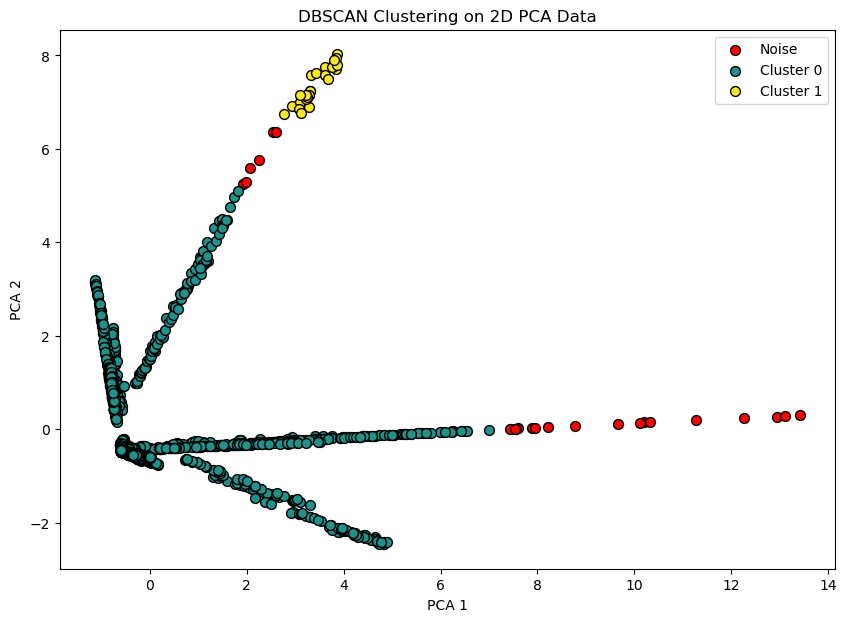

In [28]:


dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(pca_data2)

# Step 2: Visualize the DBSCAN Results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Use a colormap to distinguish clusters, -1 corresponds to noise
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:  # Label -1 is for noise
        color = 'r'  # red color for noise
        label_name = 'Noise'
    else:
        label_name = f'Cluster {label}'

    # Select data points corresponding to the current cluster label
    cluster_points = pca_data2[dbscan_labels == label]
    
    # Scatter plot for each cluster
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
               s=50, c=[color], label=label_name, edgecolors='k')

# Labels and title
ax.set_title('DBSCAN Clustering on 2D PCA Data')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')


# Add legend to show clusters and noise
plt.legend()
plt.show()